In [ ]:
pip install wordcloud

In [ ]:
pip install konlpy

In [1]:
import pandas as pd

df = pd.read_csv('pass_results_22.csv')

df

,Text
0,시작하겠습니다. 안녕하십니까. 지원자 강동원 발표 시작하겠습니다. 국내외에서 인지...
1,시작하시죠. 안녕하십니까. 지원자 강동훈 발표 시작하겠습니다. 제시된 상황에서 양...
2,포트라의 지원 방안에 대해 발표를 맡게 된 3번 지원자 김광희입니다. 저는 오늘 ...
3,4차 산업혁명의 불길 속에서 급변하는 글로벌 무역 트렌드에 맞춰 코트라는 주어진 ...
4,"제가 직면한 문제점은 다음과 같습니다. 첫째, 생산성 향상과 원가 절감에 의한 본..."
...,...
60,어떤 제품을 전략 상품으로 선택해 태국 시장에 진출해야 하는지 진출 전략에 대해 ...
61,타인을 이해하려는 노력을 멈추지 않는 사람입니다. 현 상황은 제가 회사 동기들 사...
62,A 기업은 13개 국가를 대상으로 화장품을 수출하고 있습니다. 최근에는 태국 시장...
63,눈길을 끄고 있는 아이클린이 아이클린사는 ABC 3개국 중 하나를 선택해서 해외시...


In [2]:
# 여러 행을 하나의 행으로 합치기
merged_text = ' '.join(df['Text'])

# 새로운 데이터프레임 생성
new_df = pd.DataFrame({'Text': [merged_text]})

# 기존 데이터프레임에 새로운 데이터프레임으로 교체
df = new_df
df

,Text
0,시작하겠습니다. 안녕하십니까. 지원자 강동원 발표 시작하겠습니다. 국내외에서 인지...


In [3]:
#한글만 남기기

import re

df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', x))

df

,Text
0,시작하겠습니다 안녕하십니까 지원자 강동원 발표 시작하겠습니다 국내외에서 인지도를 ...


In [4]:
# 토큰화
from konlpy.tag import Okt

okt = Okt()

# df['Text'] = df['Text'].apply(lambda x: okt.morphs(x))
df['Text'] = df['Text'].apply(lambda x: okt.nouns(x))

df

,Text
0,"[시작, 안녕하십니까, 지원, 강동원, 발표, 시작, 국내외, 인지도, 간, 기업,..."


In [5]:
# 글자수 하나인 것 제거
def remove_short_words(text_list, min_length=2):
    text = ' '.join(text_list)
    words = text.split()
    filtered_words = [word for word in words if len(word) >= min_length]
    return ' '.join(filtered_words)

# 'Text' 열에 함수 적용
df['Text'] = df['Text'].apply(remove_short_words)

df

,Text
0,시작 안녕하십니까 지원 강동원 발표 시작 국내외 인지도 기업 이번 태국 시장 진출 ...


In [6]:
# 토큰화

from konlpy.tag import Okt

okt = Okt()

# df['Text'] = df['Text'].apply(lambda x: okt.morphs(x))
df['Text'] = df['Text'].apply(lambda x: okt.nouns(x))

df

,Text
0,"[시작, 안녕하십니까, 지원, 강동원, 발표, 시작, 국내외, 인지도, 기업, 이번..."


In [7]:
stop_words = ['안녕하세요', '안녕하십니까', '지원', '때문' '으로', '이고', '로서', '에서', '에도', '하다', '입니다']

df['Text'] = df['Text'].apply(lambda x: [word for word in x if word not in stop_words])

In [8]:
df

,Text
0,"[시작, 강동원, 발표, 시작, 국내외, 인지도, 기업, 이번, 태국, 시장, 진출..."


In [9]:
from collections import Counter
import operator

df['Lemma_Frequencies'] = df['Text'].apply(lambda lemmas_list: Counter(lemmas_list))

# Counter 객체의 합계를 계산하고 'Total_Frequency' 열에 저장
df['Total_Frequency'] = df['Lemma_Frequencies'].apply(lambda x: sum(x.values()))

# 'Lemma_Frequencies' 열의 Counter 객체를 빈도수를 기준으로 내림차순으로 정렬
df['Sorted_Lemma_Frequencies'] = df['Lemma_Frequencies'].apply(lambda x: dict(sorted(x.items(), key=operator.itemgetter(1), reverse=True)))

# 'Total_Frequency' 열을 기준으로 내림차순으로 정렬
df = df.sort_values(by='Total_Frequency', ascending=False)

# 필요에 따라 열 삭제
df = df.drop(['Lemma_Frequencies', 'Total_Frequency'], axis=1)

df = df.sort_index()

In [10]:
df

,Text,Sorted_Lemma_Frequencies
0,"[시작, 강동원, 발표, 시작, 국내외, 인지도, 기업, 이번, 태국, 시장, 진출...","{'생각': 362, '제품': 247, '기업': 222, '시장': 179, '..."


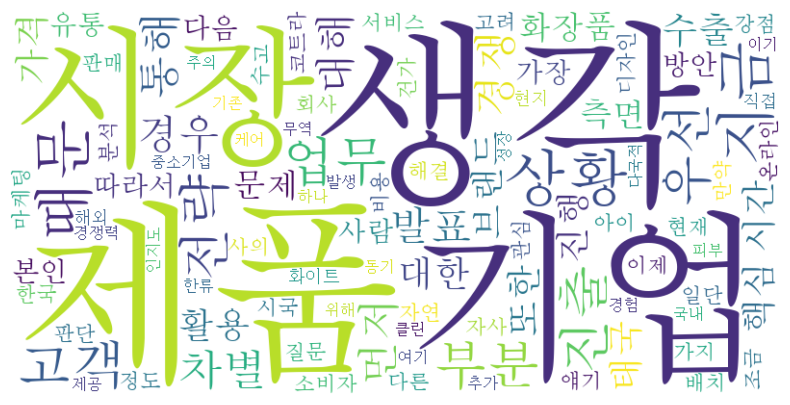

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 나눔고딕 폰트 경로 설정
font = r'C:\Windows\Fonts\batang.ttc'

# 빈도수가 높은 상위 30개의 단어 추출
top_words = list(df['Sorted_Lemma_Frequencies'][0].keys())[:100]

# 추출한 상위 30개의 단어를 공백으로 연결
top_words_text = ' '.join(top_words)

# WordCloud 객체 생성
wordcloud = WordCloud(font_path = font, width=800, height=400, background_color="white").generate(top_words_text)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
import numpy as np
from PIL import Image

# icon은 이미지 객체로 가정합니다. 필요에 따라서 이 부분을 실제 이미지 객체로 대체해주세요.
# 예를 들면: icon = Image.open('your_icon_image.png')
icon = Image.open('cloud4.jpg')

img = Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, (0, 0))  # 이미지를 왼쪽 상단에 붙이도록 수정
img = np.array(img)


In [55]:
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = font,            # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img)                  # mask 설정

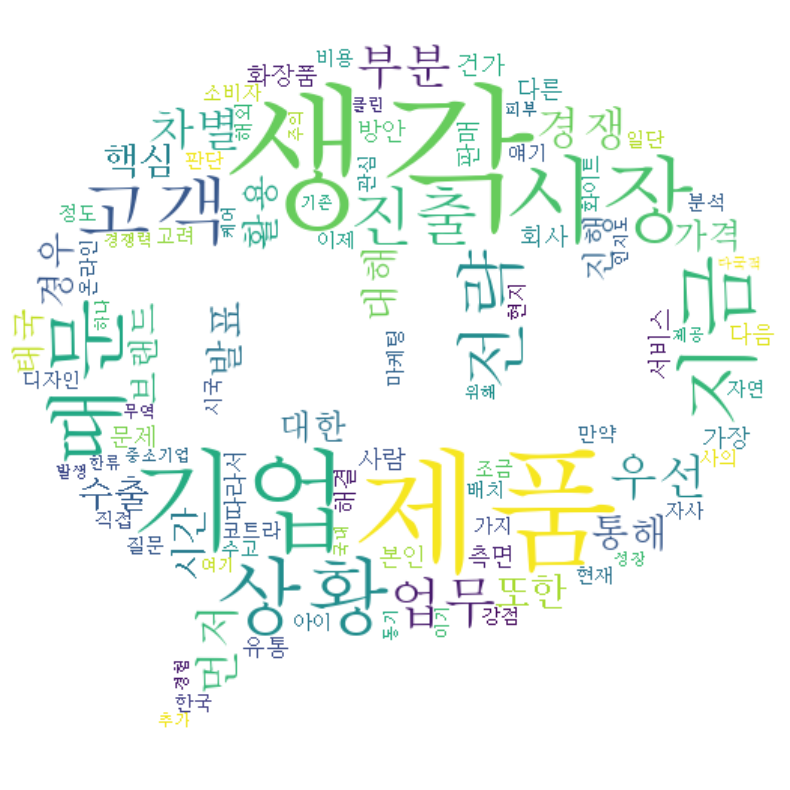

In [56]:
from wordcloud import WordCloud

# 빈도수가 높은 상위 30개의 단어 추출
top_words = dict(list(df['Sorted_Lemma_Frequencies'][0].items())[:100])

# WordCloud 객체 생성
wordcloud = wc.generate_from_frequencies(top_words)

# 시각화
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()